# ML Lab 8: Case Study on Breast Cancer Dataset using PCA


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
file_path = '/content/b cancer dataset.csv'  # Adjust path if needed
df = pd.read_csv(file_path)
from IPython.display import display
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Data Cleaning: Remove unnecessary columns and encode the target variable
df = df.drop(columns=['id', 'Unnamed: 32'])  # Drop irrelevant columns
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})  # Encode 'B' as 0 and 'M' as 1
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

In [ ]:
# Step 1: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


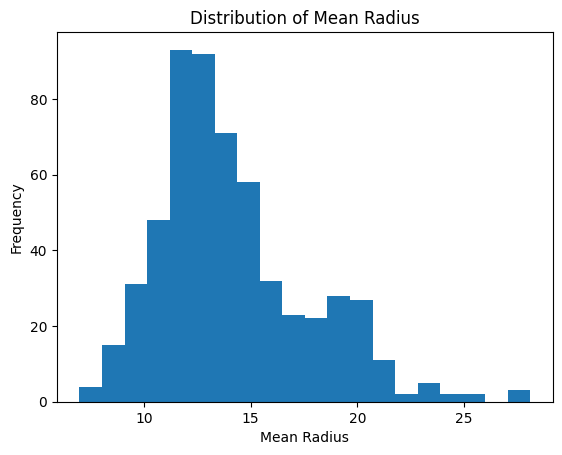

In [ ]:
# Step 2: Univariate Analysis - Visualize one feature
plt.hist(df['radius_mean'], bins=20)
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

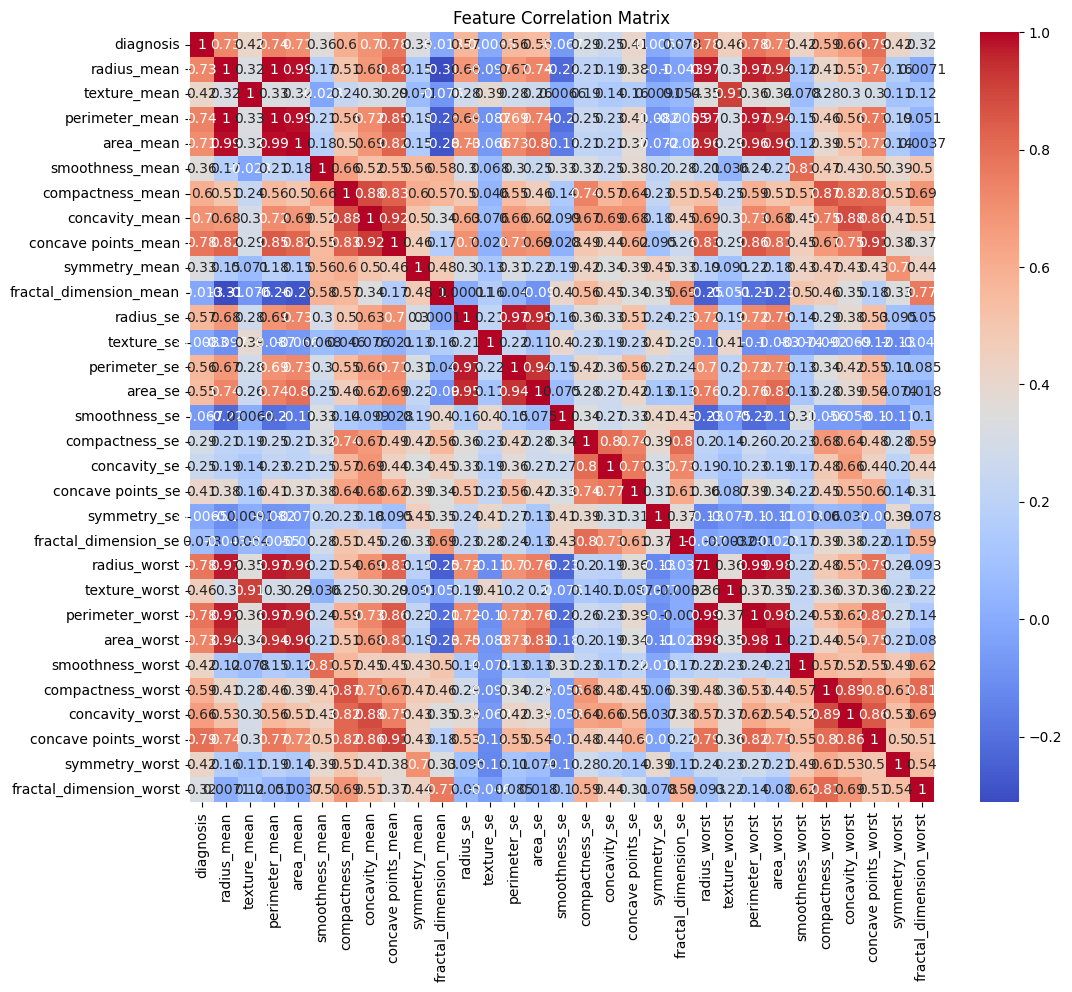

In [ ]:
#Bivariate analysis
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Step 3: PCA for Dimensionality Reduction
pca = PCA(n_components=10)  # Reduce to 10 components
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/b cancer dataset.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Data Cleaning: Remove unnecessary columns and encode the target variable
df = df.drop(columns=['id', 'Unnamed: 32'])  # Drop irrelevant columns
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})  # Encode 'B' as 0 and 'M' as 1
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA - Manual computation of the covariance matrix, eigenvectors, and eigenvalues

# Compute the covariance matrix of the standardized data
cov_matrix = np.cov(X_scaled, rowvar=False)
print("Covariance Matrix:", cov_matrix)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and their corresponding eigenvectors in descending order
eigenvalue_index = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_index]
eigenvectors_sorted = eigenvectors[:, eigenvalue_index]

# Select the top components that explain the majority of the variance
# Explained variance is the ratio of eigenvalues to the total sum of eigenvalues
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Calculate cumulative explained variance to determine how many components explain a significant portion
cumulative_variance = np.cumsum(explained_variance_ratio)


Covariance Matrix: [[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.1

In [ ]:
print("eigen values:",eigenvalues)

eigen values: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


In [ ]:
print("eigen vectors:", eigenvectors)

eigen vectors: [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
   4.94688505e-02 -3.21788366e-02 -1.13995382e-02 -1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01  2.15600995e-02 -1.07922421e-01  1.57841960e-01
   3.87061187e-02  4.11029851e-02 -2.97886446e-02 -2.73661018e-04
  -1.05339342e-02  6.58114593e-05 -1.73573093e-02  2.45566636e-02
  -8.47459309e-02  9.87867898e-02  5.54997454e-04 -9.48006326e-02
  -2.44134993e-01 -4.48369

In [ ]:
# Select the top components (let's say we choose components explaining up to 95% of the variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Reduce the data to the selected number of principal components
X_reduced = np.dot(X_scaled, eigenvectors_sorted[:, :n_components])

# Print shape of the reduced data
print(f"Reduced data shape: {X_reduced.shape}")

Number of components explaining 95% variance: 10
Reduced data shape: (569, 10)


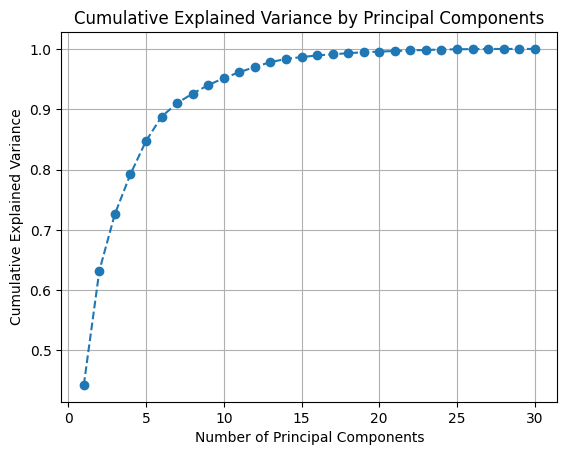

In [ ]:
# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Logistic Regression Accuracy: 98.25%
Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



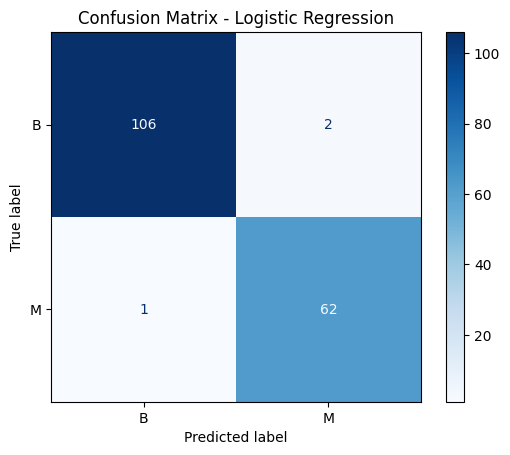

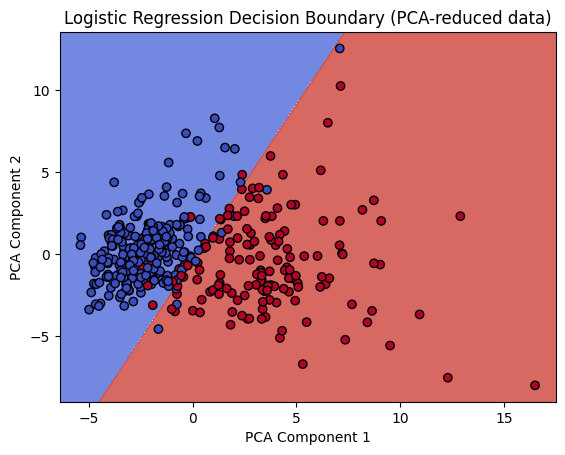

In [ ]:
#Step 4: Model Building
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Why Logistic Regression:
# Logistic Regression is chosen for its simplicity and effectiveness in binary classification problems like cancer detection.
# It assumes a linear relationship between the independent variables and the log-odds of the outcome, making it a strong baseline model.

# Separating the features and the target variable
X = df.drop(columns=['diagnosis'])  # Replace 'target_column' with the actual target column
y = df['diagnosis']  # Replace 'target_column' with the actual target column

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
X = imputer.fit_transform(X) # Applying the imputer to the entire feature set

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Description:
# Logistic Regression estimates the probability of a sample belonging to one of the two classes.
# The decision boundary is defined by the logistic function, making it suitable for binary classification tasks like benign vs malignant detection.

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 1. Model Diagram: Visualizing Decision Boundary using PCA (for a 2D plot)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Re-split the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train logistic regression on PCA-reduced data
log_reg_pca = LogisticRegression(random_state=42)
log_reg_pca.fit(X_train_pca, y_train)

# Create mesh grid for plotting decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = log_reg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
# Convert predictions to numeric representation
# Convert predictions to numeric representation
# Assuming 'B' maps to 0 and 'M' maps to 1
Z = np.where(Z == 'B', 0, 1)  # Replace 'B' with 0 and 'M' with 1

Z = Z.astype(int)  # Assuming 'B' maps to 0 and 'M' maps to 1
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
# Convert y_train to numeric representation before plotting
# Assuming 'B' maps to 0 and 'M' maps to 1
y_train_numeric = y_train.map({'B': 0, 'M': 1})
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_numeric, edgecolors='k', marker='o', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
# Step 5: Train-Validation-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

K-Fold Cross Validation Scores:  [0.96491228 0.96491228 0.93859649 0.96491228 0.95575221]
Mean CV Score:  0.9578171091445427


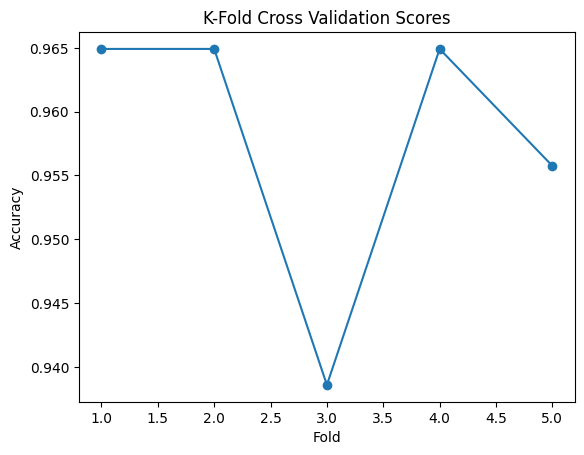

In [ ]:
#Step 6: Cross validation
# Import KFold
from sklearn.model_selection import KFold, cross_val_score # Import both KFold and cross_val_score

# Define the K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Using RandomForestClassifier for K-Fold CV
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Cross validation
cv_scores = cross_val_score(model, X, y, cv=kf)

print("K-Fold Cross Validation Scores: ", cv_scores)
print("Mean CV Score: ", np.mean(cv_scores))

# Plot the CV scores
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o')
plt.title('K-Fold Cross Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


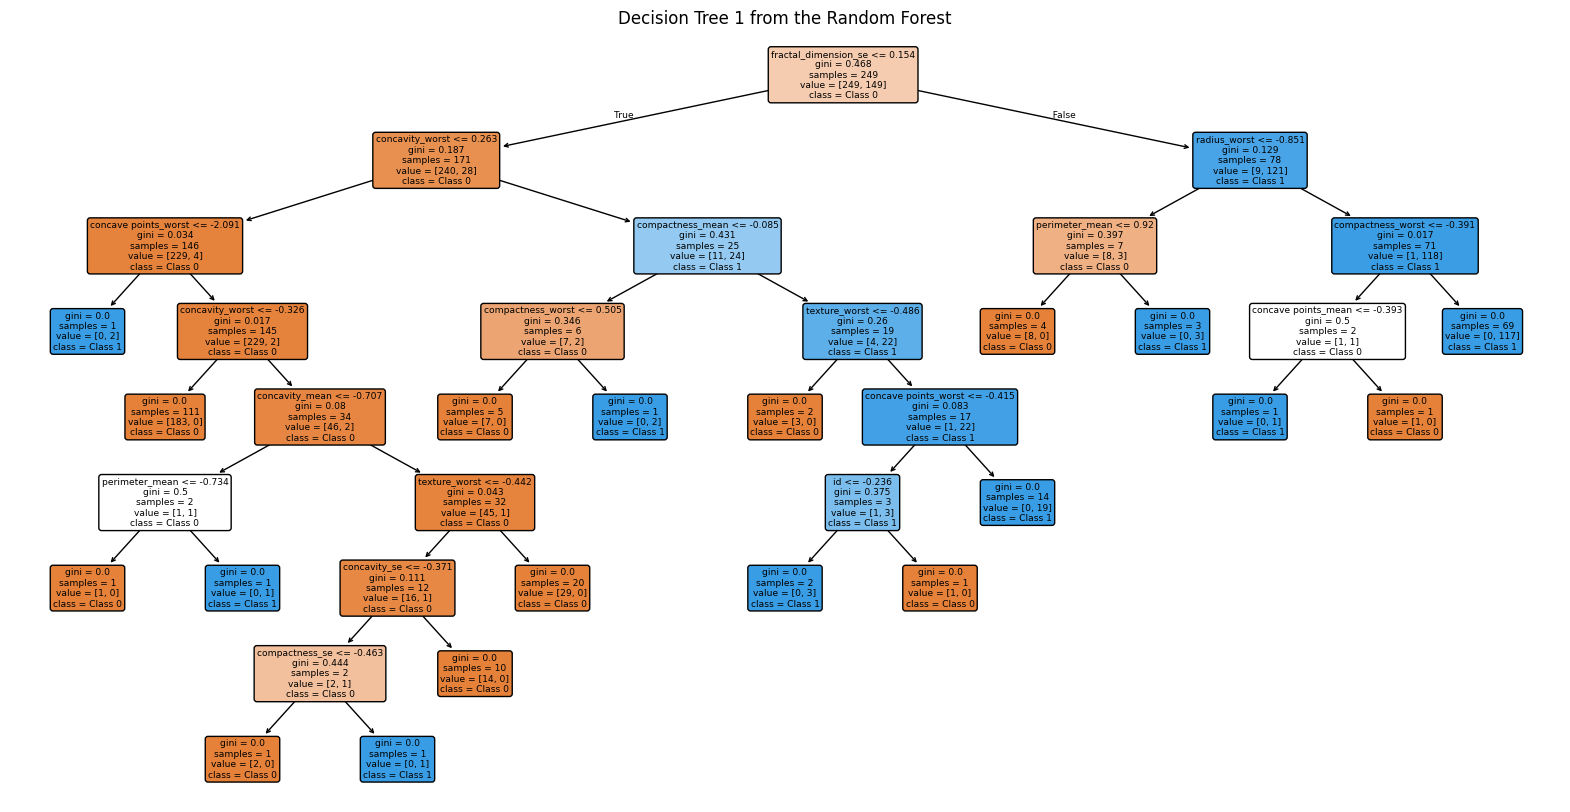

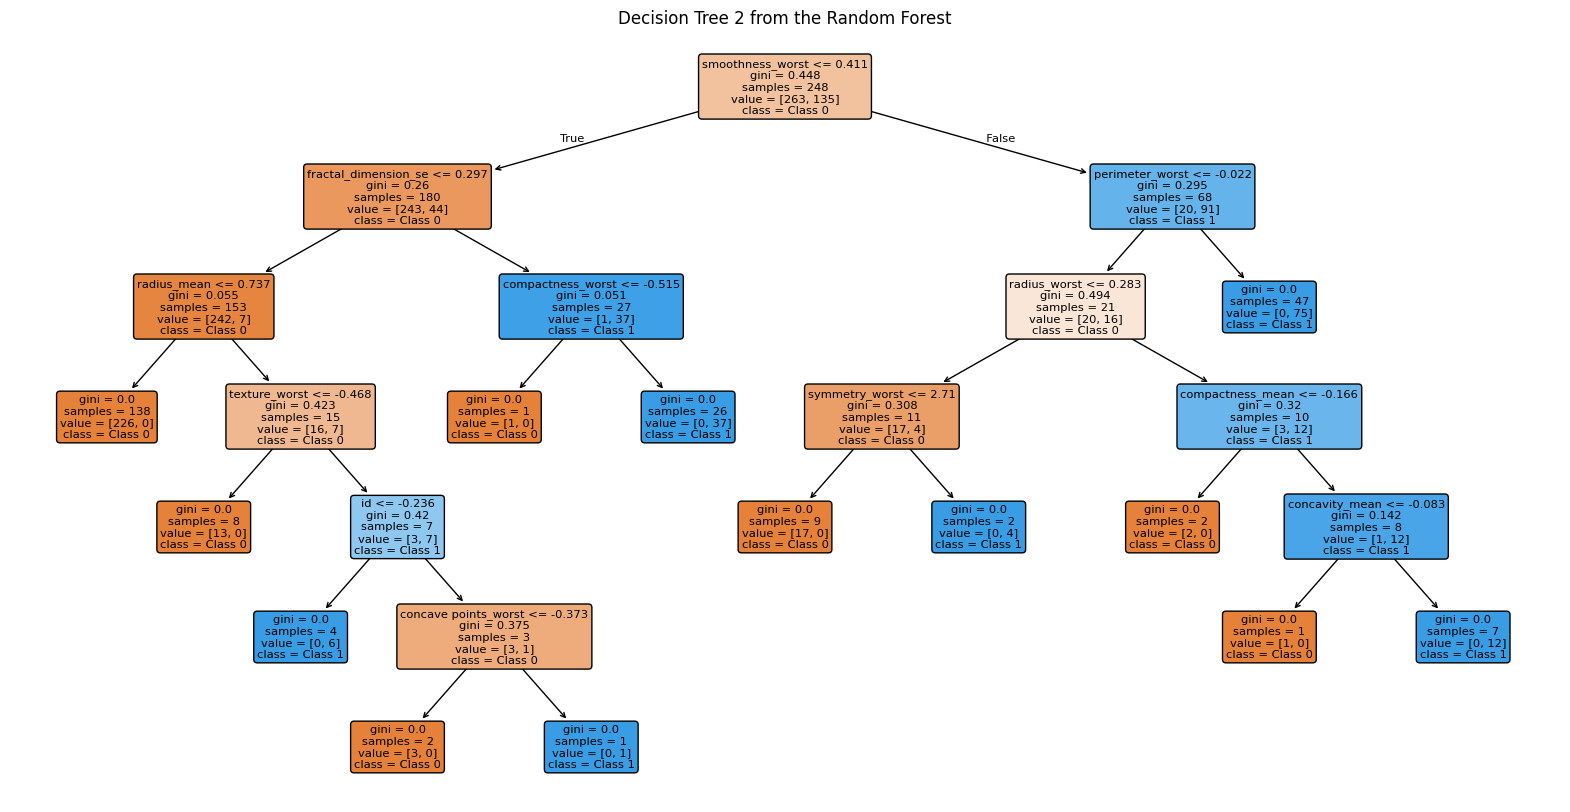

In [ ]:
#Step 7: Ensemble learning
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Separating the features and the target variable
X = df.drop(columns=['diagnosis'])  # Replace 'target_column' with the actual target column
y = df['diagnosis']  # Replace 'target_column' with the actual target column

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)  # 10 trees for easier visualization
rf_model.fit(X_train, y_train)

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=df.columns[:-1], filled=True, rounded=True, class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree 1 from the Random Forest")
plt.show()

# Plot the second tree in the forest (if desired)
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[1], feature_names=df.columns[:-1], filled=True, rounded=True, class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree 2 from the Random Forest")
plt.show()


In [ ]:
# Step 8: Model Building with Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Step 9: Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10]})

In [ ]:
# Step 10: Performance Evaluation
y_pred = grid.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99
Confusion Matrix:
 [[108   0]
 [  1  62]]


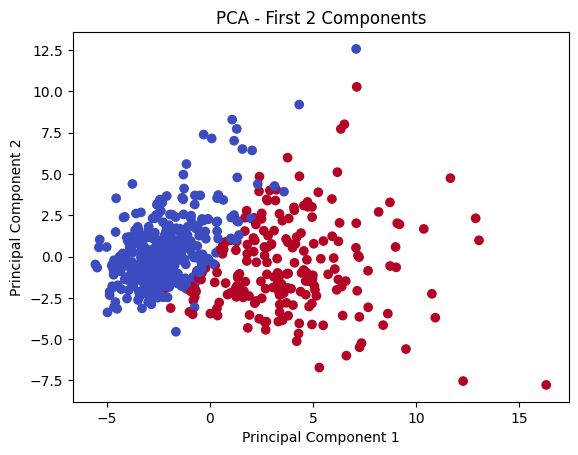

In [ ]:
# Optional: Visualize PCA Components (Multivariate Analysis)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title('PCA - First 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()